[Indice](index.ipynb) | Previo: [Fundamentos.Mecanica.Cinematica.SolucionEdM](04.01.01.02.Fundamentos.Mecanica.Cinematica.SolucionEdM.ipynb) | Siguiente: [ProblemaNCuerpos](05.00.00.00.ProblemaNCuerpos.ipynb)

### 4.1.5. Integración numérica de la e.d.m.
<a id='integracion_numerica_edm'></a>

En aquellos sistemas dinámicos en los que resolver la e.d.m. o encontrar *todas* las constantes de movimiento (resolver por cuadratura el sistema), sea imposible matemáticamente (o simplemente muy difícil), es posible buscar una solución aproximada usando métodos numéricos.  

La mayoría de los métodos numéricos inventados desde los tiempos de Euler para resolver ecuaciones diferenciales con condiciones iniciales, IVP, tales como la e.d.m., suponen que la ecuación diferencial puede *reducirse* a un conjunto de ecuaciones diferenciales de primer orden de la forma:

\begin{equation}
\label{eq:ecuaciones_reducidas}
\{\dot{Y_k} = f_k(t,\{y_i\}_M)\}_M
\end{equation}

Donde $Y_i$ ($i=0,1,2,\ldots,M-1$) es el conjunto de funciones auxiliares que reemplaza a las cantidades claves del sistema dinámico.  En física llamamos a las Ecs. ([ecuaciones_reducidas](#mjx-eqn-eq%3Aecuaciones_reducidas)) las *ecuaciones de movimiento reducidas* del sistema.

> **:Nota: Numeración comenzando en cero.** En lo sucesivo numeraremos todas las cantidades físicas y matemáticas (partículas, variables auxiliares, componentes de un vector o una matriz, etc.) comenzando en cero, tal y como se acostumbra en programación.  Esta elección facilitará la implementación de las fórmulas resultantes en rutinas o programas de computador.  Si bien la numeración comenzando en cero no es muy común en matemáticas o física existen justificaciones poderosas para su uso, algunas de las cuáles están enumeradas en ["Why numbering should start at zero"](https://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html) del maestro de maestros de la programación científica, Edsger Wybe Dijkstra.

En la [Sección *La ecuación de movimiento*](04.01.01.02.Fundamentos.Mecanica.Cinematica.SolucionEdM.ipynb#ecuacion_movimiento) ya habíamos ilustrado este proceso de reducción cuando pasamos de la e.d.m. vectorial general (Ec. [edm](#mjx-eqn-eq%3Aedm)) al conjunto de ecuaciones de primer orden (Ec. [edm_primer_orden_escalar](#mjx-eqn-eq%3Aedm_primer_orden_escalar)).  Ahora, si comparando estas últimas ecuaciones con la forma general del sistema en la Ec. ([ecuaciones_reducidas](#mjx-eqn-eq%3Aecuaciones_reducidas)), podemos hacer la siguiente identificación para las variables auxiliares $Y_k$:

\begin{equation}
\label{eq:variables_auxiliares_edm}
\begin{array}{ccc}
Y_0 = x, & Y_1 = y, & Y_2 = z\\
Y_3 = v_x, & Y_4 = v_y, & Y_5 = v_z\\
\end{array}
\end{equation}

Por otro lado, las funciones $f_k$ serán:

$$
\begin{array}{ccc}
f_0 = v_x, & f_1 = v_y, & f_2 = v_z\\
f_3 = a_x, & f_4 = a_y, & f_5 = a_z\\
\end{array}
$$

En este caso, el número de ecuaciones de movimiento reducidas será $M=6$.

Para escribir los algoritmos será útil expresar las ecuaciones de forma compacta.  Esta es una forma posible de hacerlo:

\begin{equation}
\label{eq:ecuaciones_reducidas_particula}
\dot Y_k = 
\left\{
\begin{array}{ccc}
Y_{3+k} & {\rm ,} & 0 \leq k < 3 \\
a_{k-3}  & {\rm ,} & 3\leq k < 6 
\end{array}
\right.
\end{equation}

Donde hemos introducido la notación $\{a_0,a_1,a_2\}=\{a_x,a_y,a_z\}$.

En este libro usaremos la rutina `odeint` de la biblioteca científica `scipy` (ver *Nota* abajo) para integrar numéricamente sistemas de ecuaciones diferenciales de la forma reducida.  El lector puede leer la [documentación completa de `odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) para conocer los detalles de su aplicación.  

Para ilustrar el uso de esta herramienta, volvamos sobre al ejemplo 1 de la [sección *Integracion de la e.d.m.*](04.01.01.02.Fundamentos.Mecanica.Cinematica.SolucionEdM.ipynb#integracion_edm). Las ecuaciones reducidas del sistema serán las mismas de la Ec. ([ecuaciones_reducidas_particula](#mjx-eqn-eq%3Aecuaciones_reducidas_particula)), donde ahora $\{a_0,a_1,a_2\}=\{j_0 t,0,0\}$.  

El primer paso para usar `odeint` es implementar las ecuaciones reducidas como una rutina:

<a id='code:edm_ejemplo1'></a>

In [1]:
def edm_ejemplo1(Y,t,j0):
    dYdt=[0,0,0,0,0,0]
    
    dYdt[:3]=Y[3:]
    dYdt[3:]=[j0*t,0,0]
    
    return dYdt

Aunque parece sencilla, la importancia de rutinas de este tipo (que escribiremos en distintos apartes de este libro para simular numéricamente sistemas dinámicos complejos), exije que analicemos uno a uno, cada uno de sus partes:

- Como vemos, la función de la rutina es calcular la lista de los valores de las funciones $f_k$ (lado derecho de las Ecs. [ecuaciones_reducidas](#mjx-eqn-eq%3Aecuaciones_reducidas)) que son iguales a las derivada en el tiempo de las variables auxiliares $\dot{Y}_k$. En la rutina, para hacer más explícito el significado de esta lista, hemos decidido llamarla `dYdt` en lugar de `f`.  Los nombres de las variables, no afectan la funcionalidad de las rutinas, pero pueden hacerla más legible y modificable.

- Los primeros dos argumentos de la rutina `Y` (que contiene una lista de los valores instantáneos de las variables auxiliares $Y_k$) y `t` (el tiempo en el que las variables auxiliares tienen ese valor) deben estar en ese orden (otros podrían encontrar más natural poner primero el tiempo, pero `odeint` esta diseñado para trabajar con rutinas con este *prototipo* particular.)

- Además de estos argumentos obligatorios, la rutina puede tener cualquier otro argumento adicional.  En este caso aprovechamos esta libertad para proveer el valor de la constante `j0` que aparece en la e.d.m.

- Tanto las variables `Y` como `dYdt` pueden ser o bien *listas* o bien *arreglos* de `NumPy`.  En este caso hemos escogido usar una lista para la variable `dYdt` porque hace a la rutina casi 10 veces más rápida.  Sin embargo, en situaciones más complejas, puede ser una muy buena idea usar un arreglo en su lugar.

- Para asignar los valores de la lista `dYdt` hemos aprovechado el poder de `Python` para sacar *trozos*, *porciones* o *tajadas* (*slices* en inglés) de listas y arreglos.  Así el trozo `dYdt[:3]` corresponde a las primeras tres componentes `dYdt[0]`, `dYdt[1]`, `dYdt[2]` (nótese que, por empezar en 0, este trozo no incluye la componente `dYdt[3]`.  Por otra parte el trozo `Y[3:]` de esta lista, corresponde a las componentes `Y[3]`, `Y[4]`, `Y[5]`.  Por tanto, la igualdad `dYdt[:3]=dYdt[3:]` equivale entonces a `dYdt[0]=Y[3]`, `dYdt[1]=Y[4]`, `dYdt[2]=Y[5]` que justamente implementa la ecuación $\dot{Y}_k=Y_{k+3}$ en la Ec. ([ecuaciones_reducidas_particula](#mjx-eqn-eq%3Aecuaciones_reducidas_particula))

Para resolver este conjunto de ecuaciones diferenciales debemos, además de la rutina anterior, proveer: 

1. Valores para los parámetros de la e.d.m. (en este caso la constante $j0$), 
2. Una lista de condiciones iniciales, es decir de los valores iniciales de las variables auxiliares $\{Y_k(t=t_0)\}$
3. un conjunto de valores del tiempo (incluyendo el tiempo inicial $t_0$) para los cuales deseamos predecir el estado del sistema.

El siguiente algoritmo prepara estos insumos para `odeint`:

In [2]:
from numpy import array

j0=1

Yos=array([1,0,0,-3,0,0])

ts=array([0.0,1.0,2.0,3.0,4.0,5.0])

Nótese que para las condiciones iniciales y los valores de tiempo (que son aquí arbitrarios, el lector podría escoger unos completamente diferentes) hemos escogido usar arreglos de `NumPy` (`array`) en lugar de listas planas.  Aunque esto no es obligatorio, más adelante hará más fácil la manipulación matemática de estas variables. 

Preste atención a la convención que usaremos en lo sucesivo de usar la letra *s* como sufijo del nombre de algunos arreglos y matrices (*s* por el plural).  Así, en lo sucesivo (a no ser que se indique lo contrario) `t` denotará un tiempo individual, pero `ts` será un arreglo de tiempos.

La solución numérica al cojunto de ecuaciones diferenciales implementados en la rutina `edm_ejemplo1` se obtiene, finalmente, invocando `odeint`:

In [3]:
from scipy.integrate import odeint
Ys=odeint(edm_ejemplo1,Yos,ts,args=(j0,))

In [4]:
print(f"Solucion, Ys:")
print(Ys)

Solucion, Ys:
[[ 1.          0.          0.         -3.          0.          0.        ]
 [-1.8333333   0.          0.         -2.5         0.          0.        ]
 [-3.66666663  0.          0.         -1.          0.          0.        ]
 [-3.49999996  0.          0.          1.5         0.          0.        ]
 [-0.33333329  0.          0.          5.          0.          0.        ]
 [ 6.83333338  0.          0.          9.5         0.          0.        ]]


Las filas de la matriz `Ys` contiene el valor de las variables auxiliares $\{Y_k\}$ en cada uno de los tiempos provistos.  Las columnas, naturalmente, corresponden a las componentes del vector de estado. 

Así, la componente `Ys[0,0]` corresponde al valor de la coordenada $x$ de la partícula en $t_0$ (condición inicial).  Por su parte,  `Ys[0,5]` es el valor inicial de $v_z$.  

También es posible extraer tajadas de la matriz.  Así, `Ys[:,0]` (que podría leerse como *valores de cualquier fila, de la columna 0*) corresponde al valor de la coordenada $x$ de la partícula en cada uno de los tiempos de integración.

Podemos, finalmente, visualizar la solución a la e.d.m. haciendo un gráfico de la coordenada $x$ (columna `Ys[:,0]` de la matriz de solución) como función del tiempo `ts`:

In [5]:
%matplotlib nbagg

<a id='code:ejemplo1_grafico_solucion'></a>

<IPython.core.display.Javascript object>


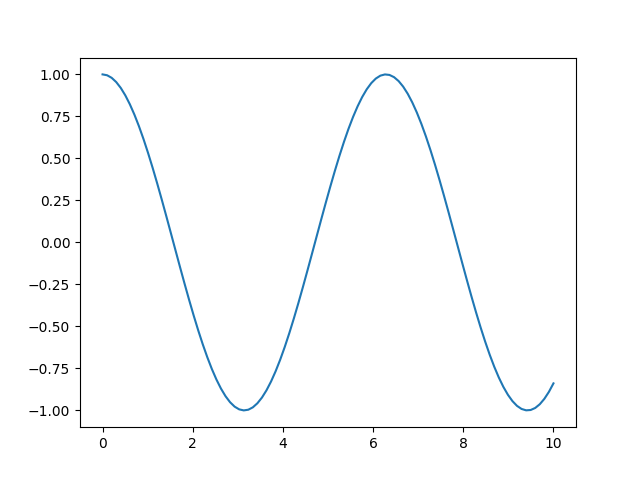

In [15]:
import matplotlib.pyplot as plt
plt.figure();
plt.plot(ts,Ys[:,0]);
plt.show();


<a id='code:ejemplo1_grafico_solucion'></a><center><b>Figura 4.7.</b> La figura muestra la solución numérica a la e.d.m. del sistema correspondiente al ejemplo 1.</center>

> **:Nota: Algoritmos detrás de `odeint`.** La rutina `odeint` es un *empaque de programación* en `Python` (*wrap* en inglés) de un complejo y robusto paquete de rutinas conocido como [`ODEPACK`](https://computing.llnl.gov/casc/odepack).  Desarrollado por el *Center for Applied Scientific Computing* del *Lawrence Livermore National Laboratory*, las rutinas de `ODEPACK` están escritas en lenguaje `FORTRAN77` (`Python` se usa únicamente para pasar los parámetros al paquete y para recuperar las salidas; ese es justamente el sentido del nombre "empaque de programación"). Han sido probadas y perfeccionadas durante varias décadas, en distintas aplicaciones científicas y de ingeniería <cite data-cite="Hindmarsh1983odepack"><a href="mybook.html#Hindmarsh1983odepack">(Hindmarsch, 1983)</a></cite>.  

> Existen otras rutinas en el paquete `scipy` para resolver ecuaciones diferenciales con condiciones inicales (IVP). Por ejemplo `ode` y `solve_ivp` pueden usarse también (esta última es, por ejemplo, la recomendada por los desarrolladores de `scipy`). Sin embargo, estas otras rutinas tienen una *interface* un poco más complicada y requieren conocimientos más avanzados de `Python`.  Así por ejemplo, para integrar la e.d.m. del ejemplo 1, usando `solve_ivp`, el código **mínimo** en `Python` sería:

```python
 from scipy.integrate import solve_ivp
 solucion=solve_ivp(fun=lambda t,y:edm_ejemplo1(y,t,j0),
                    t_span=[ts[0],ts[-1]],y0=Yos,t_eval=ts)
```
    
> Como puede apreciarse la complejidad del código supera con creces la de aquel que usamos para invocar `odeint`.  A esto se suma el hecho de que la solución, que en el caso de `odeint` es una matriz `Ys` fácil de interpretar, en el caso de `solve_ivp` es en realidad un *objeto* cuyo *atributo* `solucion.y` contiene la solución que buscamos.  Un detalle final: para el tipo de ecuaciones diferenciales que usaremos en este libro `solve_ivp` es casi dos veces más lento que `odeint`.  El lector, sin embargo puede explorar esas otras alternativas, especialmente si quiere, por ejemplo, comparar distintos métodos de solución (`odeint` escoge automáticamente el método.)

¿Cómo saber si la solución obtenida con `odeint` y mostrada en la Figura ([code:ejemplo1_grafico_solucion](#fig:code:ejemplo1_grafico_solucion)) es la correcta?  Podemos compobarlo verificando que las posiciones y velocidades obtenidas satisfagan las constantes de movimiento que escribimos en las Ecs. ([constantes_ejemplo1](#mjx-eqn-eq%3Aconstantes_ejemplo1)). Así por ejemplo, podemos verificar que el valor de $I_x$ y $S_x$ sean efectivamente constantes:

In [7]:
xs=Ys[:,0]
xdots=Ys[:,3]

Ixs=xdots-0.5*j0*ts**2
Sxs=xs-(1./6)*j0*ts**3-Ixs*ts

In [8]:
import numpy as np
np.set_printoptions(precision=3)
print(f"Valores de Ix = {Ixs}")
print(f"Valores de Sx = {Sxs}")

Valores de Ix = [-3. -3. -3. -3. -3. -3.]
Valores de Sx = [1. 1. 1. 1. 1. 1.]


Efectivamente, para todos los tiempos en los que integramos la e.d.m., dos de las constantes de movimiento, tienen el mismo valor. La solución numérica, por tanto, coincide con nuestras expectativas matemáticas.

Una verificación más completa se consigue comparando la solución numérica, con la solución analítica para $x(t)$ escrita en las Ecs. ([solucion_ejemplo1](#mjx-eqn-eq%3Asolucion_ejemplo1)): 

$$
x(t)=\frac{1}{6}j_0 t^3+I_x t+S_x
$$

Donde los valores de $I_x$ y $S_x$ pueden obtenerse de las condiciones iniciales.  Una comparación gráfica entre ambas soluciones se consigue con este algoritmo:

<a id='code:compara_numerica_analitica'></a>

<IPython.core.display.Javascript object>


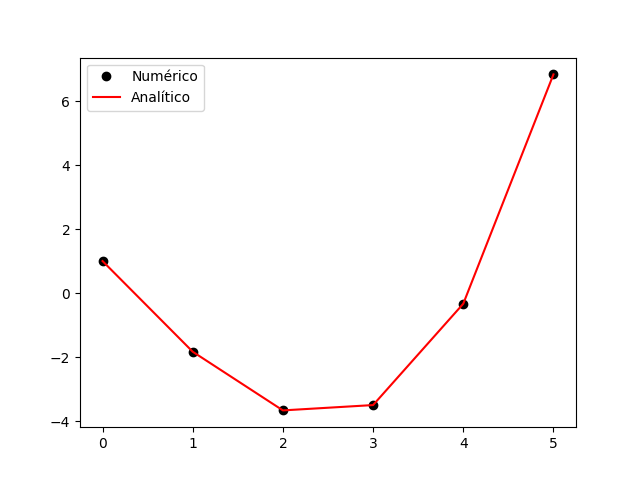

In [10]:
#Valor de las constantes de movimiento 
Ix=Yos[3]-0.5*j0*ts[0]**2
Sx=Yos[0]-(1./6)*j0*ts[0]**3+Ix*ts[0]

#Solución analítica
xs=(1./6)*j0*ts**3+Ix*ts+Sx

#Gráfico
plt.figure();
plt.plot(ts,Ys[:,0],'ko',label="Numérico");
plt.plot(ts,xs,'r-',label="Analítico");
plt.legend();
plt.show();

<a id='code:compara_numerica_analitica'></a><center><b>Figura 4.8.</b> </center>

La coincidencia entre la solución analítica y la solución numérica mostrada en la Figura ([code:compara_numerica_analitica](#fig:code:compara_numerica_analitica)) es casi perfecta.

Usando las mismas herramientas y algoritmos análogos a los usados antes, podemos ahora resolver el ejemplo 2 de la [sección *integracion de la e.d.m.*](04.01.01.02.Fundamentos.Mecanica.Cinematica.SolucionEdM.ipynb#integracion_edm). De nuevo, las ecuaciones reducidas del sistema serán, como en el ejemplo 1, las mismas de la Ec. ([ecuaciones_reducidas_particula](#mjx-eqn-eq%3Aecuaciones_reducidas_particula)), pero ahora $\{a_k\}=\{-\omega Y_0,0,0\}$ (nótese que hemos reemplazado $x$ por la variable auxiliar $Y_0$ de acuerdo a las reglas en Ec. [variables_auxiliares_edm](#mjx-eqn-eq%3Avariables_auxiliares_edm)).  La rutina que implementa las `edm` en este caso será:

In [11]:
def edm_ejemplo2(Y,t,omega):
    dYdt=[0,0,0,0,0,0]
    
    dYdt[:3]=Y[3:]
    dYdt[3:]=[-omega*Y[0],0,0]
    
    return dYdt

La solución al sistema, una comprobación de que la constante $I_x$ en la Ec. ([Ix_ejemplo2](#mjx-eqn-eq%3AIx_ejemplo2)) es en realidad una constante, y una gráfica de la posición como función del tiempo, se muestra en el siguiente algoritmo:

<a id='code:solucion_numerica_ejemplo'></a>

<IPython.core.display.Javascript object>


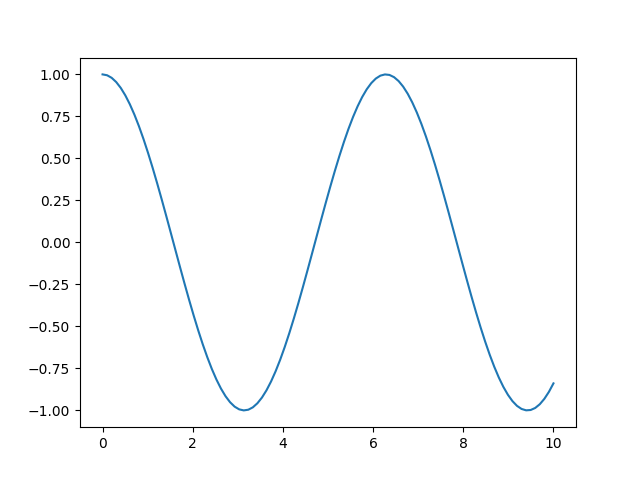

In [14]:
#Propiedades del sistema
omega=1
#Condiciones iniciales
Yos=array([1,0,0,0,0,0])
#Tiempos
from numpy import linspace
ts=linspace(0,10.0,100)
#Solución
Ys=odeint(edm_ejemplo2,Yos,ts,args=(omega,))

#Constante de movimiento
xs=Ys[:,0]
xdots=Ys[:,3]
Ixs=0.5*xdots**2+0.5*omega*xs**2

#Gráfico
plt.figure();
plt.plot(ts,Ys[:,0]);
plt.show();

<a id='code:solucion_numerica_ejemplo2'></a><center><b>Figura 4.9.</b> Gráfico de la coordenada $x$ para el sistema del ejemplo 2.</center>

In [13]:
print(f"Primeros 10 valores de Ix: {Ixs[:10]}...")

Primeros 10 valores de Ix: [-3. -3. -3. -3. -3. -3.]...


Aquí podemos comprobar al examinar la Figura ([code:solucion_numerica_ejemplo2](#fig:code:solucion_numerica_ejemplo2)), nuestra intuición inicial de que la dinámica del sistema correspondía a la de un movimiento oscilatorio, es finalmente confirmada.

[Indice](index.ipynb) | Previo: [Fundamentos.Mecanica.Cinematica.SolucionEdM](04.01.01.02.Fundamentos.Mecanica.Cinematica.SolucionEdM.ipynb) | Siguiente: [ProblemaNCuerpos](05.00.00.00.ProblemaNCuerpos.ipynb)